In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import scipy.stats as stats
import math
from pprint import pprint
%matplotlib notebook

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\Rodolfo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Firstly. It was created a single algorithm that find any function that approximates the given curve best by two methods, least-squares function approximation and moving least squares function approximation.
#### For LS method: The approximating function chosen must be in this format.
#### Where "a0,a1,..,an" are constants and "g0,g1,..,gn " are functions. We choose the constants to minimize the least-squares error.
#### Approximating function:
###  $$ G(x) = a_0g(x)_0 + a_1g(x)_1 + ... + a_mg(x)_m$$ 
### $$G(x) \in [g_0,g_1,...,g_n]  $$
#### Solve the resulting linear system matrix
### $$[ <G_{i},G_{j}>] \dot [a_0,a_1,...,a_n]^{T} = [<G_{i}Y>] \Rightarrow Aa = B \rightarrow a = A^{-1}B $$
#### For MLS method:
### $$ a(x) = A^{-1}(x)B(x)f $$
### $$ p^{T}(x)a(x) = p^{T}(x)A^{-1}(x)B(x)f = \phi (x) $$
#### Where:
### $$A(x) = P{^T}WP$$
### $$B(x) = P^{T}W$$
### $$ f = [f(x_0),f(x_1),...,f(x_{n})]^T $$
### $$ p(x) = [p_{0}(x),p_{1}(x),...,p_{m}(x)]^T $$
### $$P = \begin{bmatrix}
p^{T}(x_0)\\
p^{T}(x_1)\\
\vdots\\
p^{T}(x_m)\end{bmatrix}$$

### $$W  = \begin{bmatrix}
\omega (x - x_0) & 0 & \cdots & 0 \\
0 & \omega (x - x_1)& \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \omega (x-x_n) \end{bmatrix} $$
#### Then:
### $$ \phi (x) = p^{T}A^{-1}(x)B(x)f$$
 

### Resource: https://www.hindawi.com/journals/mpe/2015/195023/

#### It has been proposed a gaussian curve as a weighting function:
## $$ \omega (x) = e^{-\frac{(x-c)^2}{\sigma^2}}$$

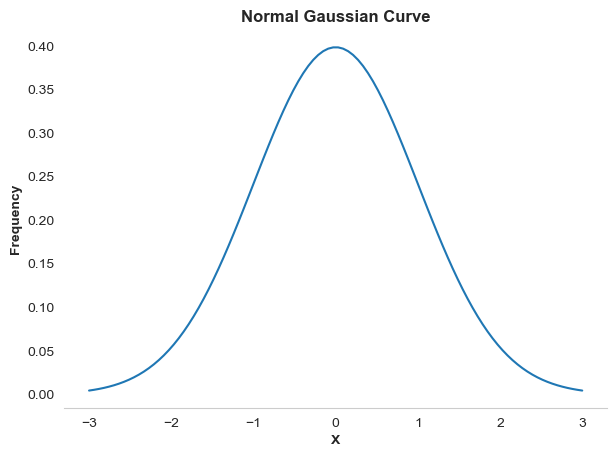

In [5]:
sea.set_style('whitegrid', {'axes.grid': False})
fig,ax = plt.subplots()
plt.xlabel('X', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.title('Normal Gaussian Curve', fontsize = 12, fontweight = 'bold')
for spine in plt.gca().spines.values():
    spine.set_visible(False)
np.random.seed(123)
mu = 0
sigma = 1
normal = np.linspace(mu -3*sigma, mu + 3*sigma, 100)
ax.plot(normal,stats.norm.pdf(normal,0,1))

for side,spine in dict(plt.gca().spines).items():
    if side == 'bottom':
        spine.set_visible(True)
    else:
        spine.set_visible(False)
        
#Setting
    plt.gcf().set_size_inches(7,5)
    plt.gcf().set_dpi(100)

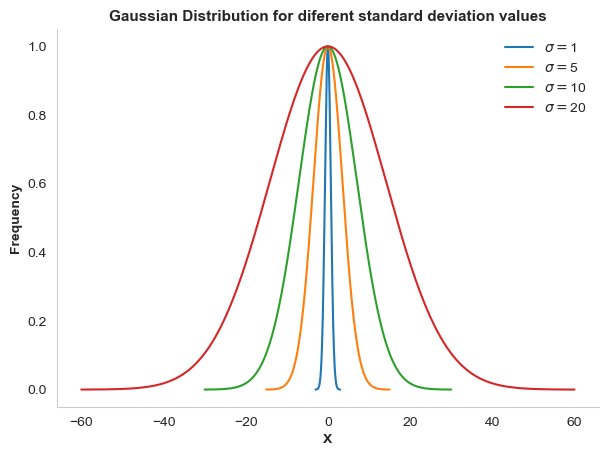

In [6]:
fig,ax = plt.subplots()
plt.xlabel('X', fontweight = 'bold')
plt.ylabel('Frequency', fontweight = 'bold')
plt.title('Gaussian Distribution for diferent standard deviation values', fontweight = 'bold', fontsize = 11)
def Gaussian_plot(sigma, c = 0, n = 1000):
    X = np.linspace(c - 3*sigma, c + 3*sigma, n)
    gaussian = np.exp((-1*(X-c)**2)/sigma**2)
    ax.plot(X,gaussian, label = '$\sigma =${}'.format(sigma))
    plt.legend(loc = 'upper right', shadow = False, frameon = False)
for i in [1,5,10,20]:
    Gaussian_plot(i)

for side,spine in dict(plt.gca().spines).items():
    if side == 'bottom':
        spine.set_visible(True)
    elif side == 'left':
        spine.set_visible(True)
    else:
        spine.set_visible(False)
        
#Setting
    plt.gcf().set_size_inches(7,5)
    plt.gcf().set_dpi(100)

## Trigonometric function approximation

In [4]:
#Setting a function that returns LS function values and MLS function values
def LS_MLS_trign(X,Y):
    n = len(X)
    pi = np.pi
    "My approximation function g(x)= a + bcosx + csinx, G = {1,cosx,senx}"
    G = {0: np.array([1]*len(X)), 1:np.cos(X), 2: np.sin(X)}
    m = len(G) # number of matrix colum/row (mXm), m-1 degree in case of n degree polynomial function
    
    #Calculating matrix P
    P = np.zeros([n,3])
    for i in range(n):
        for k in range(m):
            P[i][k] = G[k][i]
    
    #Setting Moving least Squares function
    def MLS(x, P = P, n = n, X = X, Y = Y):
        p = np.array([[1], [np.cos(x)], [np.sin(x)]])
    
        "W(x) = diag(w0(x), w1(x),..., wn(x))"
        W = np.zeros([n,n])
        for i in range(n):
            W[i][i] = np.exp((-1*((x-X[i])**2)/np.std(X)**2)) #Gaussian Function
            #W[i][i] = (1/(np.sqrt(2)*np.std(X))) * np.exp((-1*((x-X[i])**2)/np.std(X)**2))
            #W[i][i] = 1
        
        "A(x) = P'W(x)P"
        A = np.transpose(P).dot(W).dot(P)
        A_inverse = np.linalg.inv(A)
    
        "B(x) = P'W(x)Y"
        B = np.transpose(P).dot(W).dot(Y)
    
        "Shape Function"
        "a(x) = (A(x)^-1)B(x)"
        "Phi(x) = p'(A(x)^-1)B(x)"
        Shape = np.transpose(p) @ (A_inverse @ B)
        return Shape 

    #Lopping over every point xi (n points)
    Shape = np.array([],float)
    for xi in X:
        yi = MLS(xi)
        Shape = np.append(Shape,yi)
        
        
    # Least Square method
    "Produt scalar matrix A =  [<Gi,Gj>] mXm"
    A = np.zeros([m,m]) 
    
    "Independent matrix B = [<Gj,Yi]> mx1"
    B = np.zeros([m,1]) 
    
    "Matrix A"
    for i in range(m):
        for j in range(m):
            A[i][j] = np.sum(G[i]*G[j])
            
    "Matrix B"   
    for i in range(m):
        B[i][0] = np.sum(Y*G[i])

    "Linear System solution AX = B --> X = BA^-1"
    alpha = np.linalg.inv(A).dot(B)
    a = alpha[0][0]
    b = alpha[1][0]
    c = alpha[2][0]

    #Generating values from the least squares function
    g= np.array(list(map(lambda x: a +  b* math.cos(x) + c* math.sin(x),X))) #trignometric function
    return (Shape,g)      

In [7]:
#PLotting
def Plot_function(X,Y,G,Phi):
    error = (Y - Phi)
    sea.set_style('darkgrid', {'axes.grid': True})
    fig,ax = plt.subplots()
    ax.plot(X,Y, '--', color = 'forestgreen', alpha = 0.9, linewidth = 2, label = '$ f(x)$') #PLotting y values
    ax.plot(X,G, 'o', color = 'tab:blue', alpha = 0.9, markersize = 2, label = 'Least Squares Function g(x)') # Plotting LS values
    ax.plot(X,Phi, '-b', color = 'tab:red', alpha = 0.9, linewidth = 2, label = ' Moving Least Squares Function $\Phi (x)$') #Plotting MLS values
    ax.plot(X,error, '-b', color = 'blue', alpha = 0.7, linewidth = 1, label= "Error $f(x) - \Phi (x)$")
    
    #Legend 
    plt.legend(loc = 'best', shadow = False)
    
    #Label
    plt.xlabel('$X$', fontsize = 12)
    plt.ylabel('$Y$', fontsize = 12)
    plt.title('Plotting f(x), LS Function Approximation g(x) and MLS Function Approximation', fontsize = 12, fontweight = 'bold')

    #Setting
    plt.gcf().set_size_inches(11,7)
    plt.gcf().set_dpi(100)
    plt.subplots_adjust(bottom = 0.12)
    return plt.show()

### 1-) Exponential function as a curve to approximate:
## $$ f(x) = e^x\ ,x \in [0,3]$$

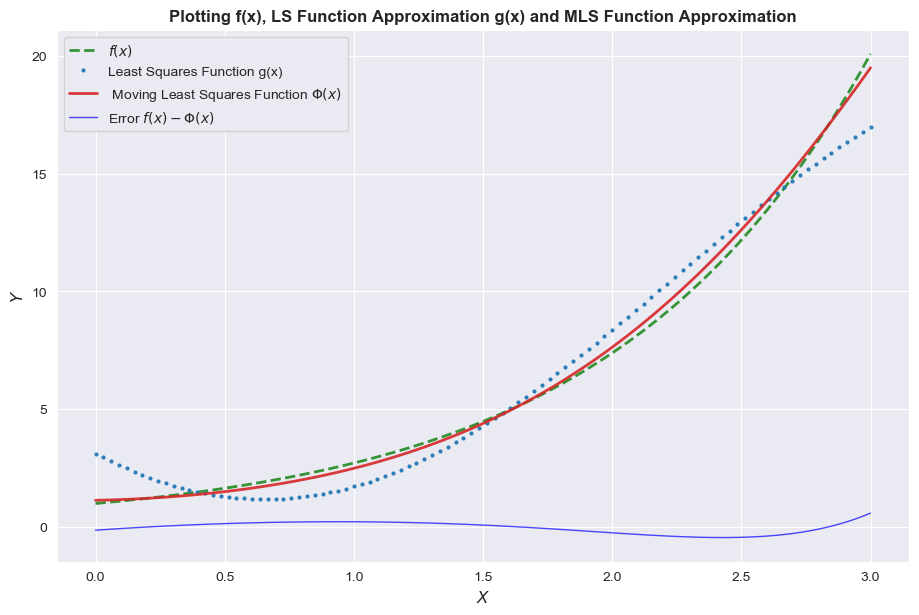

In [8]:
pi = np.pi
X1 = np.linspace(0,3, num= 100)
Y1 = np.exp(X1)
MLS_function,LS_function = LS_MLS_trign(X1,Y1)
Plot_function(X1,Y1,LS_function,MLS_function)

### 2- )
## $$ f(x) = sin(2 \pi x)+0.5cos(2x+ \frac{\pi}{3}) \ ,x \in [0,1] $$

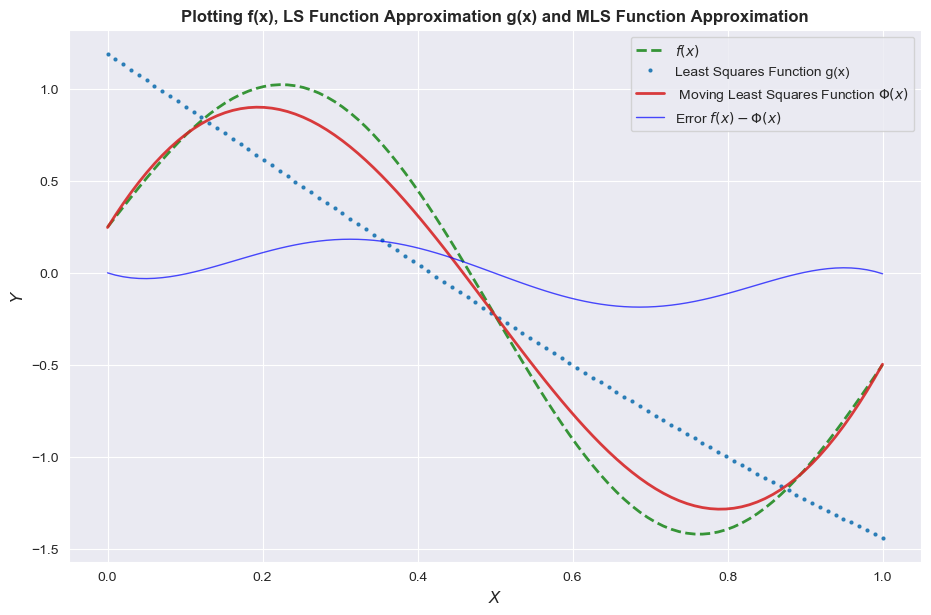

In [9]:
X2 = np.linspace(0,1,num = 100)
Y2 = np.sin(2*pi*X2) + .5*np.cos(2*X2+ pi/3) 
MLS_function,LS_function = LS_MLS_trign(X2,Y2)
Plot_function(X2,Y2,LS_function,MLS_function)

### 2- )
## $$ f(x) = sin(x)cos(x) \ , x \in [0,2\pi] $$

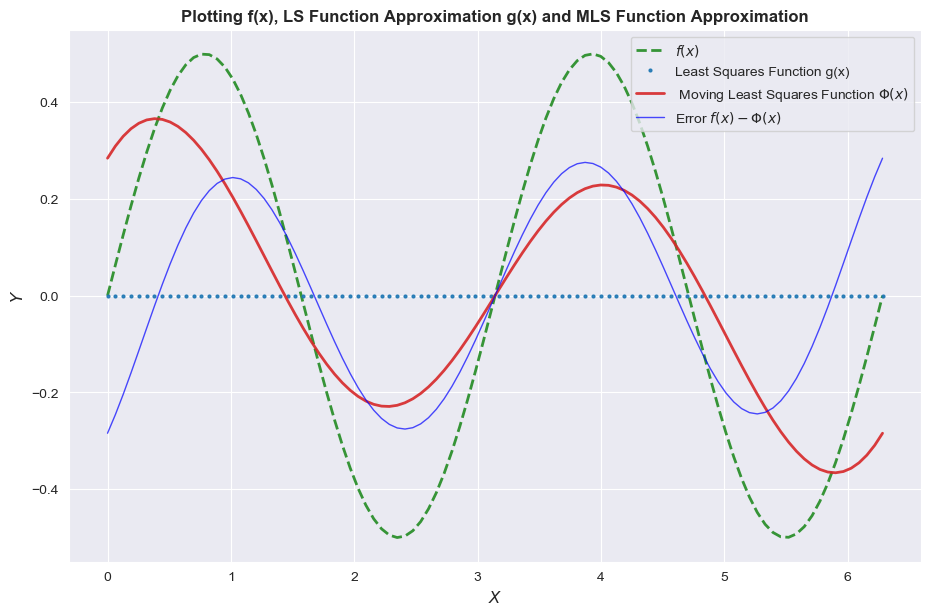

In [10]:
X3 = np.linspace(0,2*pi,num = 100)
Y3 = np.sin(X3) * np.cos(X3) 
MLS_function,LS_function = LS_MLS_trign(X3,Y3)
Plot_function(X3,Y3,LS_function,MLS_function)

#### We'd like to assess both models ( LS and MLS method). What are we supposed to do?
#### In order to do that, we set the weighting function value as one, and hence we expect the LS curve overlaps the MLS one. We assignment W[i][i] = 1 at line 21, within LS_MLS_trign function.

<IPython.core.display.Javascript object>


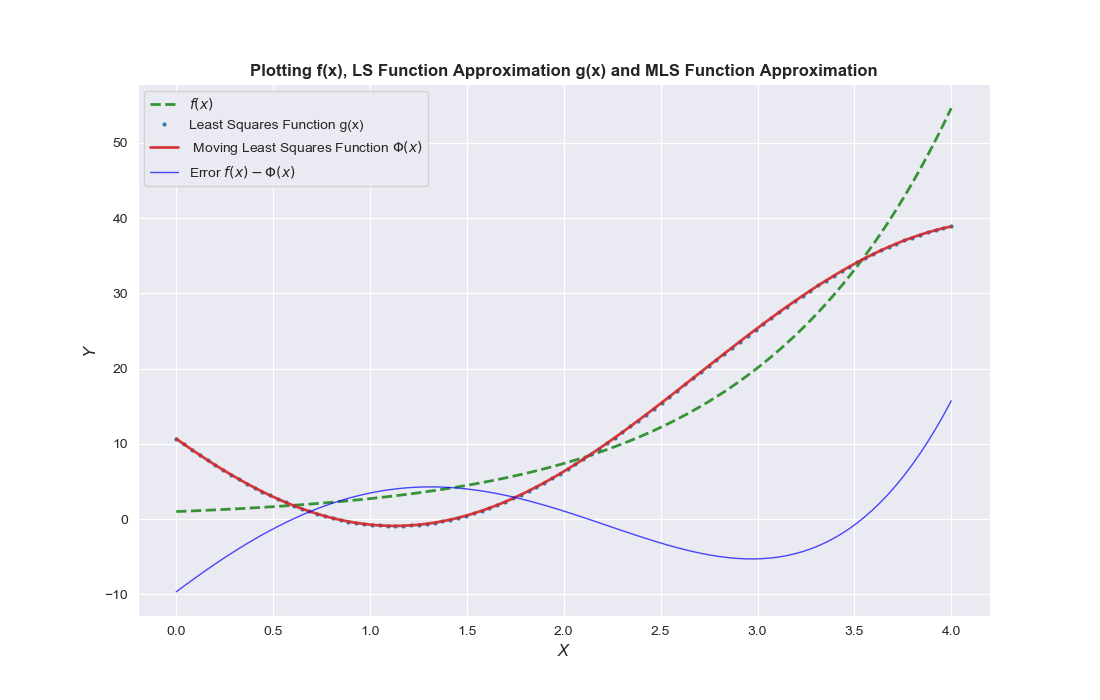

In [46]:
X1 = np.linspace(0,4, num= 100)
Y1 = np.exp(X1)
MLS_function,LS_function = LS_MLS_trign(X1,Y1)
Plot_function(X1,Y1,LS_function,MLS_function)